In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
from mpmath import mp

In [6]:
print(mp)

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]


In [7]:
import os
import sys
os.path.split(os.getcwd())[0]

'/Users/juliangarcia/Dropbox/projects/CEGT/src/python'

In [8]:
nb_dir = os.path.split(os.getcwd())[0] + '/release'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

## Algorithm 1: Direct fixation probability

In [17]:
from direct_method import fixation_probability_direct_method

In [18]:
from arbitrary_precision import fixation_direct_method_arbitrary

In [19]:
def graph_precision_a1(population_size, intensity_of_selection, a, b, c, d, p_range=range(5, 54)):
    full_precision = fixation_probability_direct_method(population_size, intensity_of_selection, a, b, c, d)
    x = []
    y = []
    for p in p_range:
        fix =fixation_direct_method_arbitrary(population_size, intensity_of_selection, a, b, c, d, precision=p)
        x.append(p)
        y.append(abs(full_precision - fix)/full_precision)
    return x, y

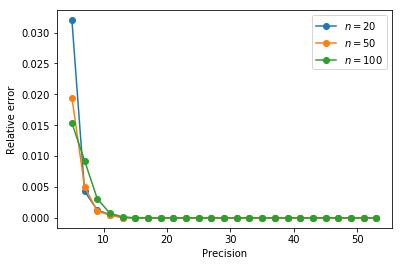

In [29]:
a=2 
b=5
c=1
d=3
x, y = graph_precision_a1(population_size=20, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=20$')
x, y = graph_precision_a1(population_size=50, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=50$')
x, y = graph_precision_a1(population_size=100, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=100$')
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Relative error")
#plt.savefig('alg1a.pdf')

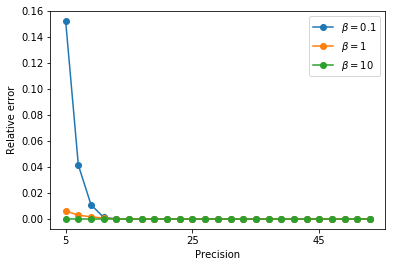

In [31]:
a=2 
b=5
c=1
d=3
x, y = graph_precision_a1(population_size=50, intensity_of_selection=0.1, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=0.1$')
x, y = graph_precision_a1(population_size=50, intensity_of_selection=1.0, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=1$')
x, y = graph_precision_a1(population_size=50, intensity_of_selection=10.0, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=10$')
plt.xticks(range(5, 60, 20))
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Relative error")
#plt.savefig('alg1b.pdf')

## Algorithm 2:  Direct unconditional fixation time

In [32]:
from direct_method import direct_unconditional_fixation_time

In [33]:
from arbitrary_precision import direct_unconditional_fixation_time_arbitrary

In [34]:
def graph_precision_a2(population_size, intensity_of_selection, a, b, c, d, p_range=range(5, 54)):
    full_precision = direct_unconditional_fixation_time(population_size, intensity_of_selection, a, b, c, d)
    x = []
    y = []
    for p in p_range:
        try:
            fix =direct_unconditional_fixation_time_arbitrary(population_size, intensity_of_selection, a, b, c, d, precision=p)
        except TypeError:
            print(population_size)
            print(p)
            print(intensity_of_selecttion)
            return
        x.append(p)
        y.append(abs(full_precision - fix)/full_precision)
    return x, y

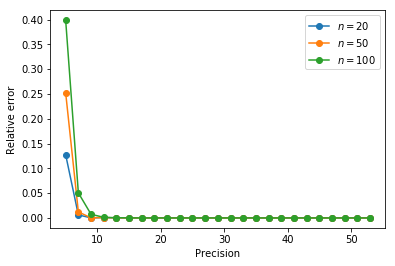

In [35]:
a=2 
b=5
c=1
d=3
x, y = graph_precision_a2(population_size=20, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=20$')
x, y = graph_precision_a2(population_size=50, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=50$')
x, y = graph_precision_a2(population_size=100, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=100$')
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Relative error")
#plt.savefig('alg2a.pdf')

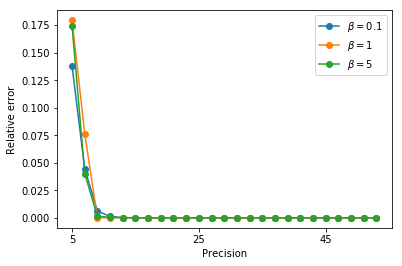

In [36]:
a=2 
b=5
c=1
d=3
x, y = graph_precision_a2(population_size=50, intensity_of_selection=0.1, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=0.1$')
x, y = graph_precision_a2(population_size=50, intensity_of_selection=1.0, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=1$')
x, y = graph_precision_a2(population_size=50, intensity_of_selection=2.0, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=5$')
plt.xticks(range(5, 60, 20))
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Relative error")
#plt.savefig('alg2b.pdf')

## Algorithm 3: Direct conditional fixation time

In [37]:
from direct_method import direct_conditional_fixation_time

In [38]:
from arbitrary_precision import direct_conditional_fixation_time_arbitrary

In [39]:
def graph_precision_a3(population_size, intensity_of_selection, a, b, c, d, p_range=range(5, 54)):
    full_precision = direct_conditional_fixation_time(population_size, intensity_of_selection, a, b, c, d)
    x = []
    y = []
    for p in p_range:
        fix =direct_conditional_fixation_time_arbitrary(population_size, intensity_of_selection, a, b, c, d, precision=p)
        x.append(p)
        y.append(abs(full_precision - fix)/full_precision)
    return x, y

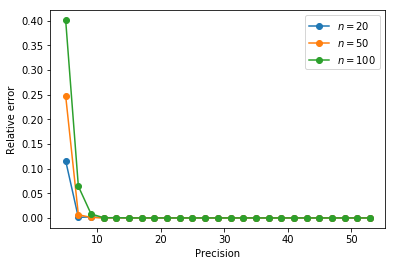

In [51]:
a=2 
b=5
c=1
d=3
x, y = graph_precision_a3(population_size=20, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=20$')
x, y = graph_precision_a3(population_size=50, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=50$')
x, y = graph_precision_a3(population_size=100, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=100$')
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Relative error")
#plt.savefig('alg3a.pdf')

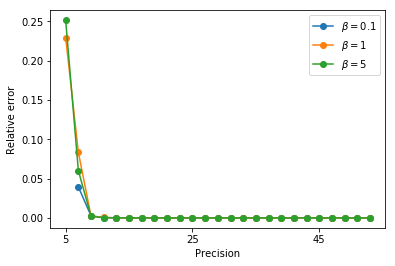

In [45]:
a=2 
b=5
c=1
d=3
x, y = graph_precision_a3(population_size=50, intensity_of_selection=0.1, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x[1:], y[1:], '-o', label=r'$\beta=0.1$')
x, y = graph_precision_a3(population_size=50, intensity_of_selection=1.0, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=1$')
x, y = graph_precision_a3(population_size=50, intensity_of_selection=5.0, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=5$')
plt.xticks(range(5, 60, 20))
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Relative error")
#plt.savefig('alg3b.pdf')

## Algorithm 4: Direct stationary distribution

In [13]:
from arbitrary_precision import direct_stationary_arbitrary
from direct_method import direct_stationary
from scipy.stats import entropy

In [14]:
def graph_precision_a4(population_size, intensity_of_selection, a, b, c, d, mu, p_range=range(5, 54)):
    full_precision = direct_stationary(population_size, intensity_of_selection, a, b, c, d, mu)
    x = []
    y = []
    for p in p_range:
        stationary =direct_stationary_arbitrary(population_size, intensity_of_selection, a, b, c, d, mu, precision=p)
        x.append(p)
        y.append(entropy(list(map(float, stationary)), full_precision))
    return x, y

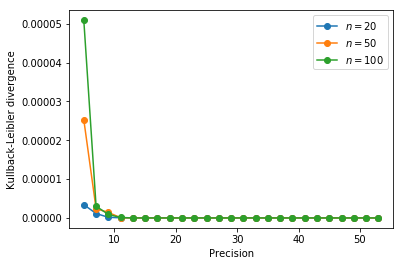

In [23]:
a=2 
b=5
c=1
d=3
mu = 0.001
x, y = graph_precision_a4(population_size=20, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, mu=mu, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=20$')
x, y = graph_precision_a4(population_size=50, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, mu=mu, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=50$')
x, y = graph_precision_a4(population_size=100, intensity_of_selection=0.5, a=a, b=b, c=c, d=d,  mu=mu, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=100$')
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Kullback-Leibler divergence",  )
plt.subplots_adjust(left=0.15)
#plt.savefig('alg4a.pdf', )

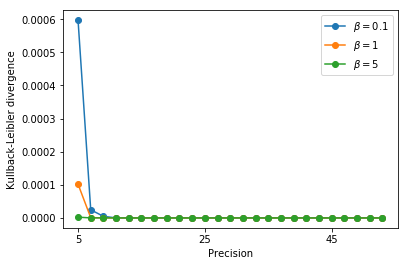

In [16]:
a=2 
b=5
c=1
d=3
mu = 0.001
x, y = graph_precision_a4(population_size=50, intensity_of_selection=0.1, a=a, b=b, c=c, d=d, mu=mu, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=0.1$')
x, y = graph_precision_a4(population_size=50, intensity_of_selection=1.0, a=a, b=b, c=c, d=d, mu=mu, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=1$')
x, y = graph_precision_a4(population_size=50, intensity_of_selection=5.0, a=a, b=b, c=c, d=d, mu=mu, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=5$')
plt.xticks(range(5, 60, 20))
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Kullback-Leibler divergence")
#plt.savefig('alg4b.pdf', bbox_inches='tight')

# Algorithm 5: Matrix-based fixation probability

In [55]:
from arbitrary_precision import fixation_probability_matrix_based_arbitrary
from matrix_method import fixation_probability_matrix_based

In [56]:
def graph_precision_a5(population_size, intensity_of_selection, a, b, c, d, p_range=range(5, 54)):
    full_precision = fixation_probability_matrix_based(population_size, intensity_of_selection, a, b, c, d)
    x = []
    y = []
    for p in p_range:
        fix =fixation_probability_matrix_based_arbitrary(population_size, intensity_of_selection, a, b, c, d, precision=p)
        x.append(p)
        y.append(abs(full_precision - fix)/full_precision)
    return x, y

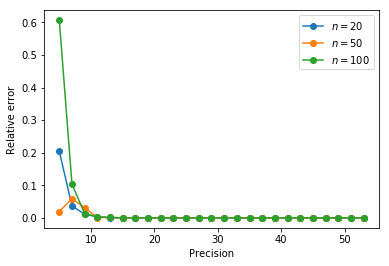

In [57]:
a=2 
b=5
c=1
d=3
x, y = graph_precision_a5(population_size=20, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=20$')
x, y = graph_precision_a5(population_size=50, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=50$')
x, y = graph_precision_a5(population_size=100, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=100$')
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Relative error")
#plt.savefig('alg5a.pdf')

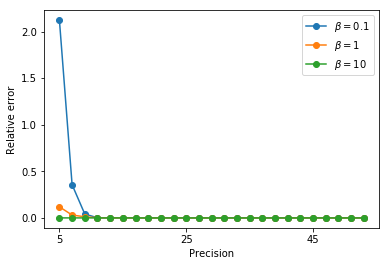

In [58]:
a=2 
b=5
c=1
d=3
x, y = graph_precision_a5(population_size=50, intensity_of_selection=0.1, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=0.1$')
x, y = graph_precision_a5(population_size=50, intensity_of_selection=1.0, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=1$')
x, y = graph_precision_a5(population_size=50, intensity_of_selection=10.0, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=10$')
plt.xticks(range(5, 60, 20))
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Relative error")
#plt.savefig('alg5b.pdf')

## Algorithm 6: Matrix-based unconditional fixation time

In [59]:
from arbitrary_precision import unconditional_fixation_time_arbitrary
from matrix_method import transition_matrix_unconditional_fixation_time

In [60]:
def graph_precision_a6(population_size, intensity_of_selection, a, b, c, d, p_range=range(5, 54)):
    full_precision = transition_matrix_unconditional_fixation_time(population_size, intensity_of_selection, a, b, c, d)
    x = []
    y = []
    for p in p_range:
        fix =unconditional_fixation_time_arbitrary(population_size, intensity_of_selection, a, b, c, d, precision=p)
        x.append(p)
        y.append(abs(full_precision - fix)/full_precision)
    return x, y

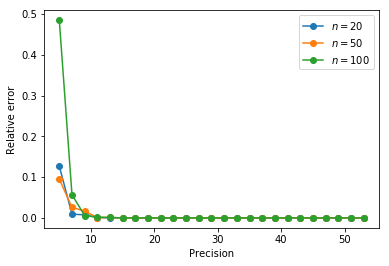

In [61]:
a=2 
b=5
c=1
d=3
x, y = graph_precision_a6(population_size=20, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=20$')
x, y = graph_precision_a6(population_size=50, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=50$')
x, y = graph_precision_a6(population_size=100, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=100$')
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Relative error")
#plt.savefig('alg6a.pdf')

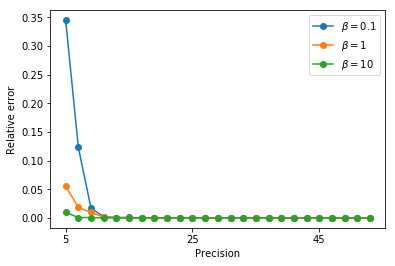

In [62]:
a=2 
b=5
c=1
d=3
x, y = graph_precision_a6(population_size=50, intensity_of_selection=0.1, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=0.1$')
x, y = graph_precision_a6(population_size=50, intensity_of_selection=1.0, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=1$')
x, y = graph_precision_a6(population_size=50, intensity_of_selection=10.0, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=10$')
plt.xticks(range(5, 60, 20))
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Relative error")
#plt.savefig('alg6b.pdf')

# Algorithm 7: Matrix-based conditional fixation time

In [67]:
from arbitrary_precision import conditional_fixation_time_arbitrary
from matrix_method import transition_matrix_conditional_fixation_time

In [68]:
def graph_precision_a7(population_size, intensity_of_selection, a, b, c, d, p_range=range(5, 54)):
    full_precision = transition_matrix_conditional_fixation_time(population_size, intensity_of_selection, a, b, c, d)
    x = []
    y = []
    for p in p_range:
        fix =conditional_fixation_time_arbitrary(population_size, intensity_of_selection, a, b, c, d, precision=p)
        x.append(p)
        y.append(abs(full_precision - fix)/full_precision)
    return x, y

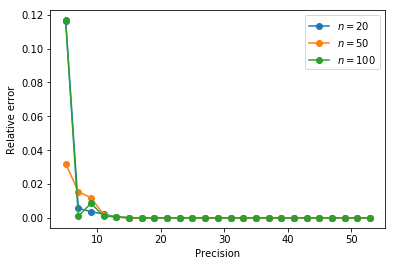

In [69]:
a=2 
b=5
c=1
d=3
x, y = graph_precision_a7(population_size=20, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=20$')
x, y = graph_precision_a7(population_size=50, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=50$')
x, y = graph_precision_a7(population_size=100, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=100$')
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Relative error")
#plt.savefig('alg7a.pdf')

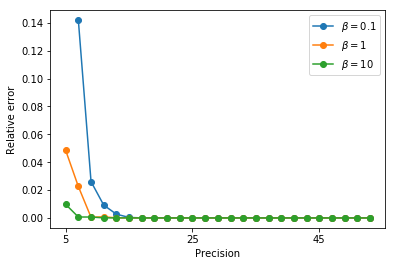

In [71]:
a=2 
b=5
c=1
d=3
x, y = graph_precision_a7(population_size=50, intensity_of_selection=0.1, a=a, b=b, c=c, d=d, p_range=range(7, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=0.1$')
x, y = graph_precision_a7(population_size=50, intensity_of_selection=1.0, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=1$')
x, y = graph_precision_a7(population_size=50, intensity_of_selection=10.0, a=a, b=b, c=c, d=d, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=10$')
plt.xticks(range(5, 60, 20))
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Relative error")
#plt.savefig('alg7b.pdf')

# Algorithm 8: Matrix-based stationary distribution

In [9]:
from arbitrary_precision import stationary_matrix_arbitrary
from dense_matrix_method import matrix_stationary_remove_equation_non_banded

In [10]:
def entropy_mpf(p, q):
    assert len(p) == len(q)
    ans = 0
    for i in range(len(p)):
        ratio = mp.fdiv(p[i], q[i])
        ans += mp.fprod([p[i], mp.log(ratio)]) 
    return ans

In [11]:
def graph_precision_a8(population_size, intensity_of_selection, a, b, c, d, mu, p_range=range(5, 54)):
    full_precision = stationary_matrix_arbitrary(population_size, intensity_of_selection, a, b, c, d, mu, precision=53)
    x = []
    y = []
    for p in p_range:
        stationary =stationary_matrix_arbitrary(population_size, intensity_of_selection, a, b, c, d, mu, precision=p)
        if stationary is not None and full_precision is not None:
                as_numpy = np.array(stationary.tolist()).flatten()
                y.append(entropy_mpf(as_numpy, full_precision))
                x.append(p)
    return x, y

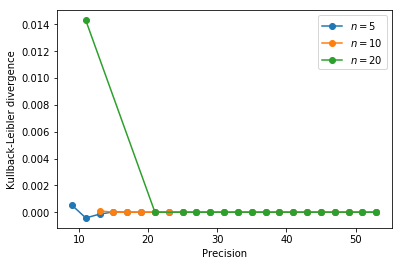

In [17]:
a=2 
b=5
c=1
d=3
mu = 0.001
x, y = graph_precision_a8(population_size=5, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, mu=mu, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=5$')
x, y = graph_precision_a8(population_size=10, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, mu=mu, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=10$')
x, y = graph_precision_a8(population_size=20, intensity_of_selection=0.5, a=a, b=b, c=c, d=d, mu=mu, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label='$n=20$')
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Kullback-Leibler divergence")
#plt.savefig('alg8a.pdf')

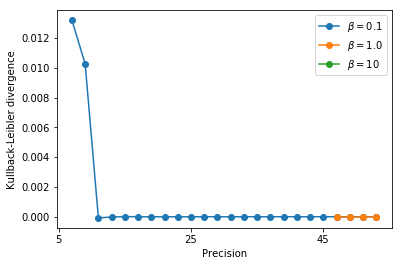

In [18]:
a=2 
b=5
c=1
d=3
mu = 0.001
x, y = graph_precision_a8(population_size=20, intensity_of_selection=0.1, a=a, b=b, c=c, d=d, mu=mu, p_range=range(7, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=0.1$')
x, y = graph_precision_a8(population_size=20, intensity_of_selection=1.0, a=a, b=b, c=c, d=d, mu=mu, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=1.0$')
x, y = graph_precision_a8(population_size=20, intensity_of_selection=10.0, a=a, b=b, c=c, d=d, mu=mu, p_range=range(5, 54, 2))
plt.plot(x, y, '-o', label=r'$\beta=10$')
plt.xticks(range(5, 60, 20))
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Kullback-Leibler divergence")
#plt.savefig('alg8b.pdf')